<a href="https://colab.research.google.com/github/claudiasofiaC/DS-Unit-2-Kaggle-Challenge/blob/master/assignment_kaggle_challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [3]:
# make like a banana and split

train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=92)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [0]:
import numpy as np

In [6]:
# explore some more

for column in train:
  values = train[column].unique()
  if 0 in values: 
    print(f'Zeros found in {column}')

Zeros found in id
Zeros found in amount_tsh
Zeros found in gps_height
Zeros found in longitude
Zeros found in num_private
Zeros found in district_code
Zeros found in population
Zeros found in public_meeting
Zeros found in permit
Zeros found in construction_year


In [12]:
# values that occur frequently when construction yr is 0

for cols in train.columns: 
  z_con_year = train[train['construction_year'] == 0]
  if z_con_year[cols].dtype != 'object':
    pass
else:
  print('Column:', cols)
  print('Highest:',z_con_year[cols].mode()[0])
  print('Occurs:',z_con_year[cols].value_counts()[0],'/', z_con_year[cols].shape[0])
  print( )

Column: status_group
Highest: functional
Occurs: 8448 / 16599



In [0]:
from statistics import mean, mode, stdev


In [0]:
import matplotlib.pyplot as plt


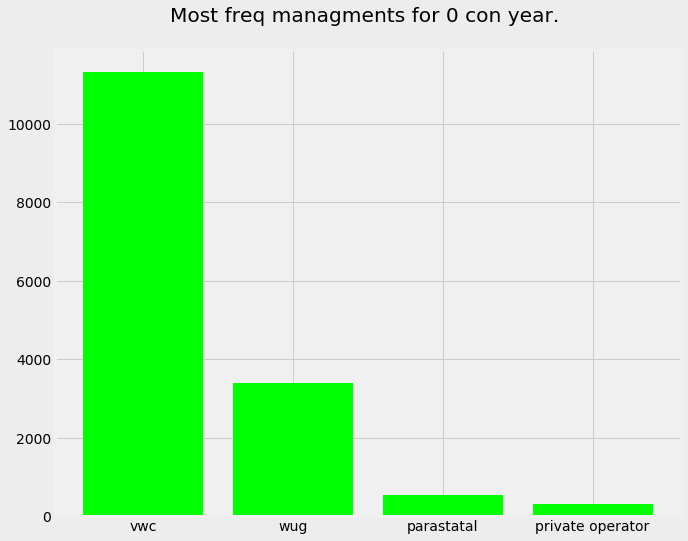

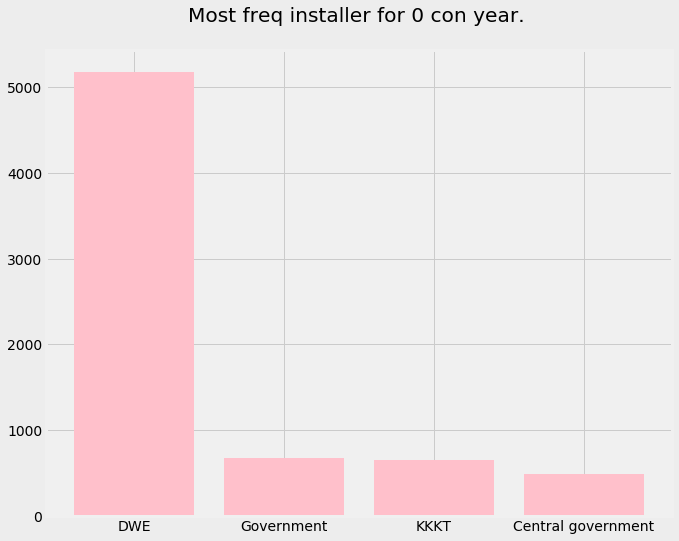

In [16]:
# Visualize some of the relationships between construction year and other features
plt.style.use('fivethirtyeight')

# Groupby management
group_management = train.groupby('construction_year')['management'].value_counts()
plt.figure(facecolor='#ededed', figsize=(10,8))
plt.title('Most freq managments for 0 con year. \n')
plt.bar(group_management[0].index[0:4], group_management[0:4], color='lime')
plt.show()

# Groupby installer
group_installer = train.groupby('construction_year')['installer'].value_counts()
plt.figure(facecolor='#ededed', figsize=(10,8))
plt.title('Most freq installer for 0 con year. \n')
plt.bar(group_installer[0].index[0:4], group_installer[0:4], color='pink')
plt.show()


In [0]:
# define function to wrangle data

def wrangle(X):
    X = X.copy()
    
    # Set some conditions to fix 0 in numeric columns
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # Replace 0 with NaN
    fill_zeros = ['longitude', 'latitude']
    for column in fill_zeros:
        X[column] = X[column].replace(0, np.nan)
    
    # Drop duplicate columns
    X = X.drop(columns=['quality_group', 'source_type', 'source_class', 'quantity_group', 'payment_type', 
                        'extraction_type', 'extraction_type_group', 'waterpoint_type'])
    
    # Set numeric and Categorical columns
    numbers = X.select_dtypes('number').columns
    categorical_features = X.select_dtypes('object').columns
    # Check if categorical has nulls.
    # Get nunique / Less encode
    for column in categorical_features:
        # If null values greater than 0
        if X[column].isnull().sum() > 0:
            # If number of unique options greater than 5
            if X[column].nunique() > 5:
                # Get 5 most frequent, impute Other for everything else
                frequent = X[column].value_counts()[:5].index
                X.loc[~X[column].isin(frequent), column] = 'Other'
            # Less than 5, encode all possible values, Impute Other for everything else
            else:
                possible_values = X[column].unique()
                X.loc[~X[column].isin(possible_values), column] = 'Other'
        # If cardinality greater than 35 values
        if X[column].nunique() > 35:
            # Bring it down to 10
            frequent = X[column].value_counts()[:10].index
            X.loc[~X[column].isin(frequent), column] = 'Other'
    
    # here we gooooo
    return X

In [0]:
# wrangle up!

train = wrangle(train)

valid = wrangle(val)

In [22]:
# cover up 0's in construction yr

con_X = train[train['construction_year']!=0]
y_mod = con_X['construction_year']
x_mod = con_X[['installer', 'management']]
    
from sklearn.linear_model import Ridge
import category_encoders as ce
from sklearn.pipeline import make_pipeline
    
# Set up pipeline
con_pipe = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    Ridge(.1, solver='lsqr')
)
    
# Train the model
con_pipe.fit(x_mod, y_mod)

mask = train[train['construction_year']==0]
x_vals = mask[['installer','management']]
predictions = [int(x) for x in con_pipe.predict(x_vals)]
print(f"Fill in zeros with {mode(predictions)}.")

Fill in zeros with 1997.


In [0]:
def fill_con_zero(X):
    X = X.copy()
    feature = ['construction_year']
    for col in feature:
        X[col] = X[col].replace(0, 1997)
    return X

In [0]:
train = fill_con_zero(train)
validation = fill_con_zero(valid)

In [25]:
# check out the new shape

train.shape, validation.shape

((47520, 33), (11880, 33))

In [0]:
# arrange matrix

target = 'status_group'
features = train.drop(columns=['id', target]).columns

X_train = train[features]
X_val = validation[features]
y_train = train[target]
y_val = validation[target]
X_test = test[features]


In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


In [0]:
model_pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(drop_invariant=True),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_estimators=100, bootstrap=True, n_jobs=-1, max_depth=22, random_state=42)
)

In [29]:
model_pipeline.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['date_recorded', 'funder', 'installer',
                                      'wpt_name', 'basin', 'subvillage',
                                      'region', 'lga', 'ward', 'public_meeting',
                                      'recorded_by', 'scheme_management',
                                      'scheme_name', 'permit',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'water_quality', 'quantity', 'source',
                                      'waterpoint_type...
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=22,
                                        max_features='auto',
                                        ma

In [30]:
# oof
# yuck, mucho overfit

model_pipeline.score(X_train, y_train)



0.9570075757575758

In [31]:
# not terrible!

model_pipeline.score(X_val, y_val)


0.8033670033670034

In [33]:
# predict on combined train and val

Xt_Yv = pd.concat([X_train, X_val])
yt_Yv = pd.concat([y_train, y_val])

model_pipeline.score(Xt_Yv, yt_Yv)

0.9262794612794613

In [0]:
# set to csv
y_pred = model_pipeline.predict(X_test)
sample_submission['status_group'] = y_pred
sample_submission.to_csv('', index=False)